# *CNN Model Training on Built_In Tensorflow Gray Image Data (MNIST) and CIFAR - 10 Color Image Dataset (10 Labels)*

# Exp_1: On Gray Image Datasets

## Step 1. Import Necessary Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

## Step 2. Load image data

In [ ]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

### *Plot and Check what is the data in mnist*

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 10))
for i in range(9):
    # Randomly select an index
    index = np.random.randint(0, x_train.shape[0])
    print(index)
    # Extract the image and label
    image = x_train[index]
    label = y_train[index]
    #image = x_test[i]
    # Plot the image
    plt.subplot(3, 3, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')

plt.show()

In [ ]:
x_train[0]

## Step 3. Always Normalize your data before training.

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train[1]

## Step 3.1. Add addational dimension in Gray Images

In [ ]:
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

## Step 4. Build Your CNN Model

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
x_train.shape

In [ ]:
model.summary()

## Step 5: Pull all of data, model together

In [ ]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

## Step 6: Train the model

In [ ]:
history = model.fit(x_train, y_train, epochs = 5, validation_split = 0.2, verbose = 1)

## Step 7. Evaluate the model

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['loss'], label='Train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Step 8. Make Predicitions

In [ ]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

In [ ]:
predicted_labels, y_test

## Step 9. Print Classification Report

In [ ]:
print('\nClassification Report:')
print(classification_report(y_test, predicted_labels))

In [ ]:
print('\nConfusion Matrix:')
conf_mat = confusion_matrix(y_test, predicted_labels)
print(conf_mat)

## Step 10. Visulaize on a random test sample: Inferencing

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    idx = np.random.randint(0, len(x_test))
    ax.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    ax.set_title(f'Actual: {y_test[idx]}, Predicted: {predicted_labels[idx]}')
    ax.axis('off')
plt.show()

# EXP_2: On Color Image Data - Cifar-10

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
X = x_train[1]
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values to be between 0 and 1

In [3]:
X

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

<Figure size 1000x1000 with 0 Axes>

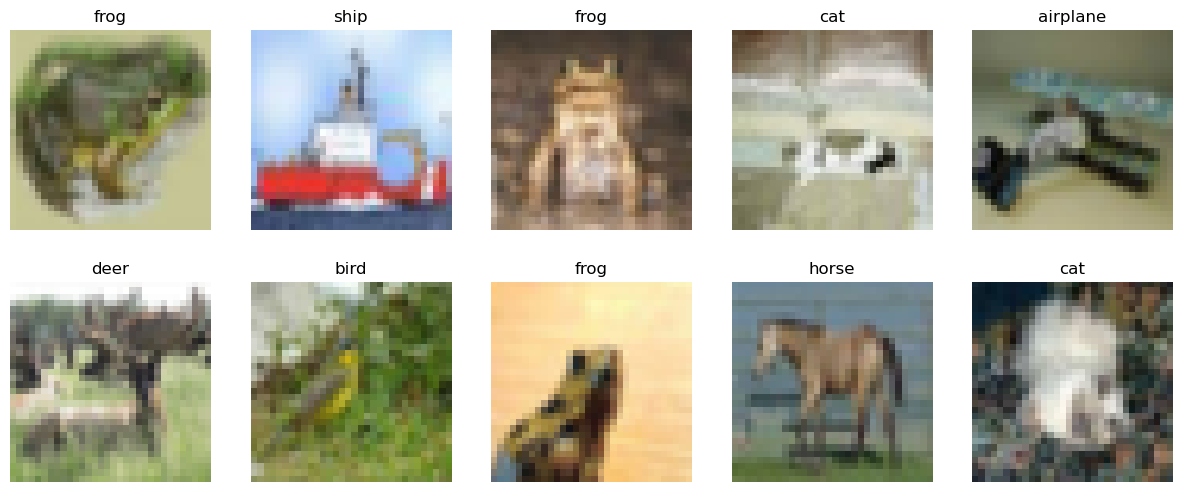

In [4]:
# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 10))
# Function to plot sample images with class names
def plot_sample_images(images, labels, class_names, num_samples=10):
    indices = np.random.choice(len(images), num_samples)
    plt.figure(figsize=(15, 6))
    for i in range(num_samples):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[indices[i]])
        plt.title(class_names[labels[indices[i]][0]])
        plt.axis('off')
    plt.show()

# Plot sample images
plot_sample_images(x_test, y_test, class_names)

In [5]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [6]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [9]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10


1563/1563 [==============================] - 15s 9ms/step - loss: 1.4941 - accuracy: 0.4578 - val_loss: 1.1994 - val_accuracy: 0.5721
Epoch 2/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1334 - accuracy: 0.5987 - val_loss: 1.1695 - val_accuracy: 0.5913
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9919 - accuracy: 0.6495 - val_loss: 0.9672 - val_accuracy: 0.6615
Epoch 4/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.8946 - accuracy: 0.6867 - val_loss: 0.9032 - val_accuracy: 0.6916
Epoch 5/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8264 - accuracy: 0.7103 - val_loss: 0.8745 - val_accuracy: 0.7028
Epoch 6/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.7731 - accuracy: 0.7279 - val_loss: 0.8598 - val_accuracy: 0.7068
Epoch 7/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7257 - accuracy: 0.7465 - val_loss: 0.8591 - va

313/313 - 1s - loss: 0.8666 - accuracy: 0.7114 - 998ms/epoch - 3ms/step

Test accuracy: 0.7113999724388123


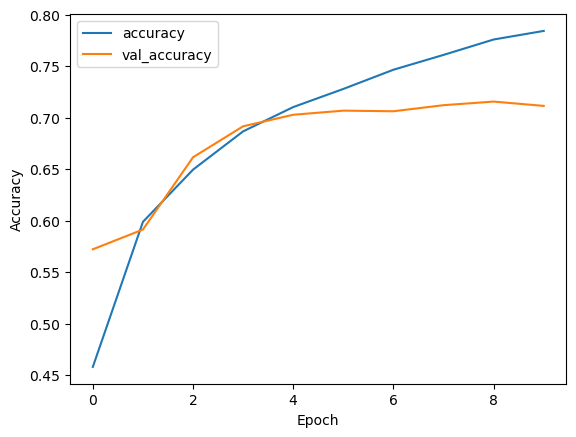

In [11]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
# Make predictions on the test set
predictions = model.predict(x_test)
predicted_labels = tf.argmax(predictions, axis=1).numpy()

313/313 [==============================] - 1s 4ms/step


In [13]:
# Print classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print('\nClassification Report:')
print(classification_report(tf.argmax(y_test, axis=1).numpy(), predicted_labels))

print('\nConfusion Matrix:')
conf_mat = confusion_matrix(tf.argmax(y_test, axis=1).numpy(), predicted_labels)
print(conf_mat)


Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.76      0.73      1000
           1       0.89      0.79      0.84      1000
           2       0.67      0.55      0.61      1000
           3       0.53      0.54      0.53      1000
           4       0.69      0.67      0.68      1000
           5       0.58      0.67      0.62      1000
           6       0.83      0.70      0.76      1000
           7       0.72      0.79      0.75      1000
           8       0.79      0.82      0.80      1000
           9       0.75      0.84      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000


Confusion Matrix:
[[757  14  45  15  19   9   4  21  68  48]
 [ 29 792   5   8   4   9   9  10  32 102]
 [ 69   2 552  81  96  86  44  38  16  16]
 [ 35   9  50 537  56 187  33  49  23  21]
 [ 24   1  54  71 669  46 

1/1 [==============================] - 0s 27ms/step


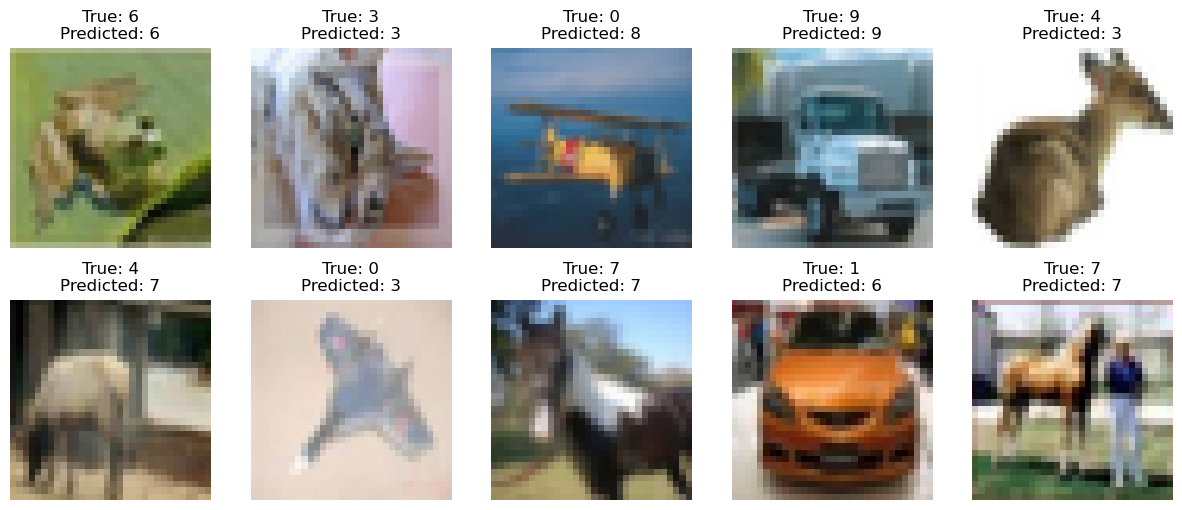

In [14]:
# Choose a random subset of test data for visualization
num_images_to_visualize = 10
indices = np.random.choice(len(x_test), num_images_to_visualize)

# Make predictions on the selected test data
selected_images = x_test[indices]
true_labels = np.argmax(y_test[indices], axis=1)
predictions = model.predict(selected_images)
predicted_labels = np.argmax(predictions, axis=1)

# Plot the images with true and predicted labels
plt.figure(figsize=(15, 6))
for i in range(num_images_to_visualize):
    plt.subplot(2, 5, i + 1)
    plt.imshow(selected_images[i])
    plt.title(f'True: {true_labels[i]}\nPredicted: {predicted_labels[i]}')
    plt.axis('off')

plt.show()

# *What is the output across each of the layers in the trained Model*

In [15]:
layer_outputs = [layer.output for layer in model.layers[1:]]
layer_outputs

[<KerasTensor: shape=(None, 15, 15, 32) dtype=float32 (created by layer 'max_pooling2d')>,
 <KerasTensor: shape=(None, 13, 13, 64) dtype=float32 (created by layer 'conv2d_1')>,
 <KerasTensor: shape=(None, 6, 6, 64) dtype=float32 (created by layer 'max_pooling2d_1')>,
 <KerasTensor: shape=(None, 4, 4, 64) dtype=float32 (created by layer 'conv2d_2')>,
 <KerasTensor: shape=(None, 1024) dtype=float32 (created by layer 'flatten')>,
 <KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'dense')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_1')>]

In [16]:
layer_names = [layer.name for layer in model.layers]
layer_names

['conv2d',
 'max_pooling2d',
 'conv2d_1',
 'max_pooling2d_1',
 'conv2d_2',
 'flatten',
 'dense',
 'dense_1']

# *What Features your Model is Learning*

In [46]:
feature_visualization_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

In [47]:
X.shape

(32, 32, 3)

In [48]:
x = X.reshape((1,32,32,3))

In [49]:
x.shape

(1, 32, 32, 3)

### *COMPUTE Feature Maps for Input Image x*

In [50]:
feature_maps = feature_visualization_model.predict(x)

1/1 [==============================] - 0s 79ms/step


(1, 15, 15, 32)


C:\Users\Dr.PVVK\AppData\Local\Temp\ipykernel_27360\3046043247.py:10: RuntimeWarning: invalid value encountered in divide
  x /= x.std()
C:\Users\Dr.PVVK\AppData\Local\Temp\ipykernel_27360\3046043247.py:13: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x,0,255).astype('uint8')
C:\Users\Dr.PVVK\AppData\Local\Temp\ipykernel_27360\3046043247.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(scale*channels, scale))


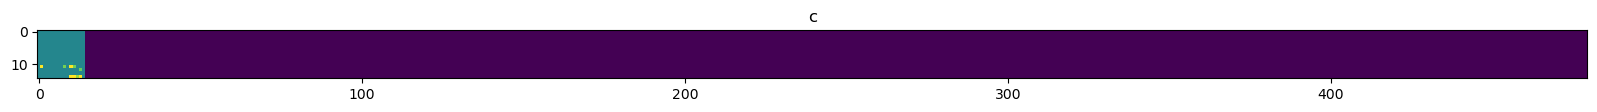

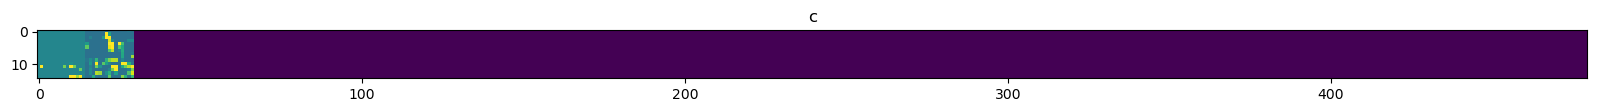

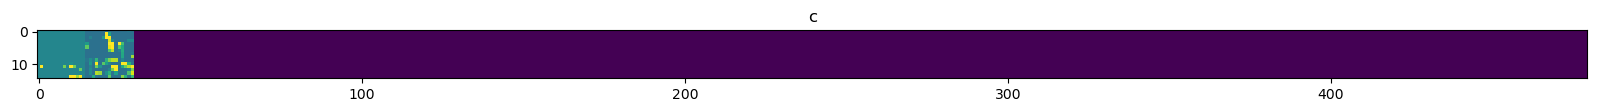

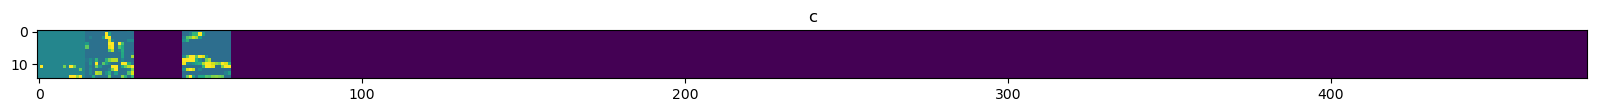

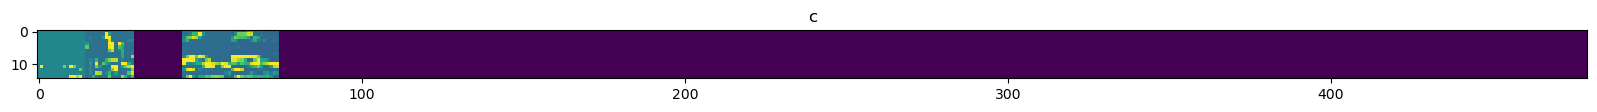

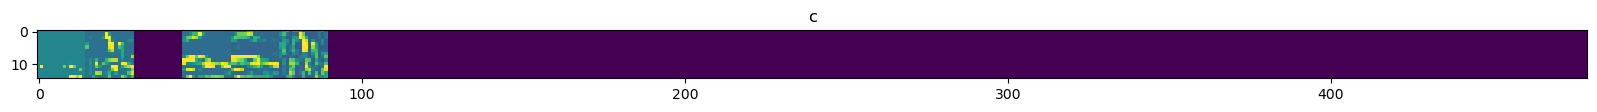

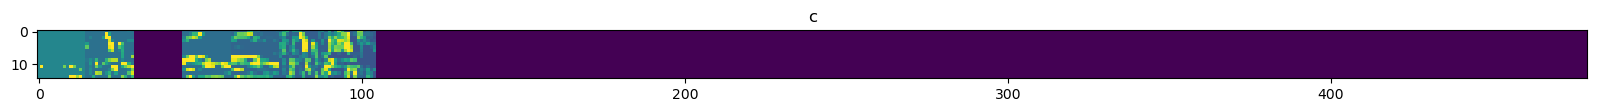

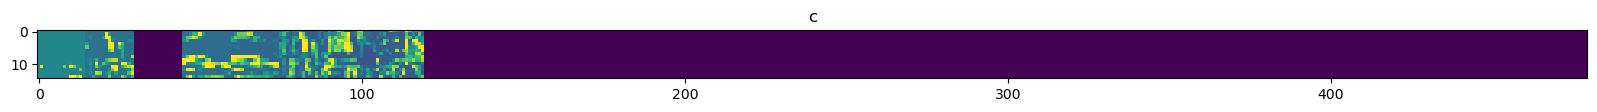

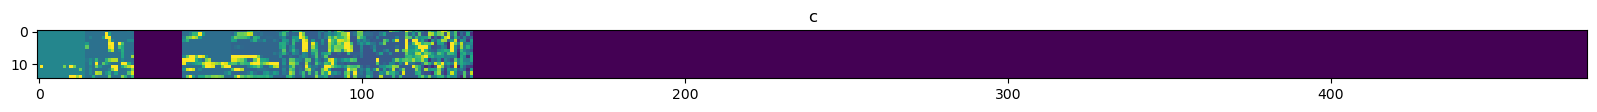

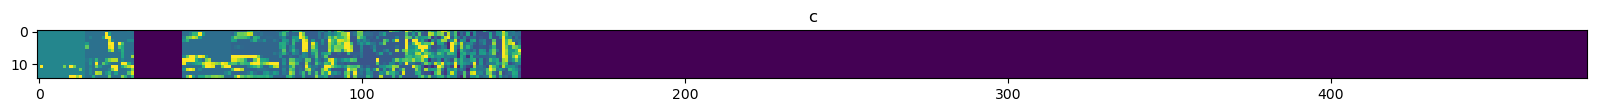

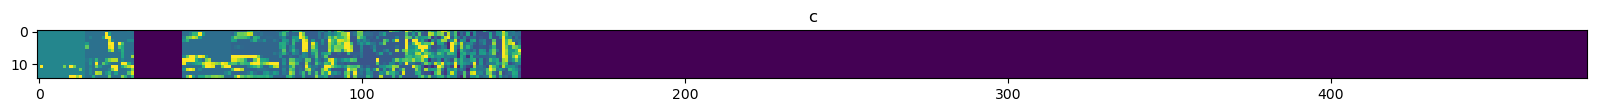

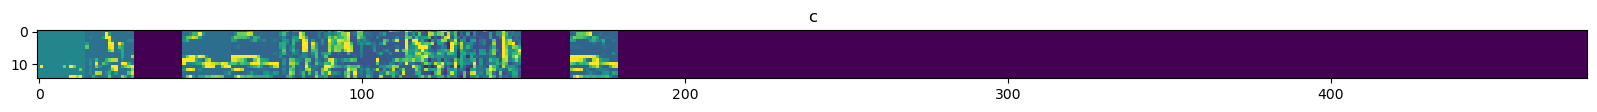

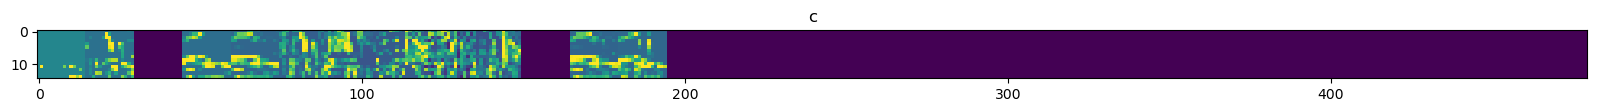

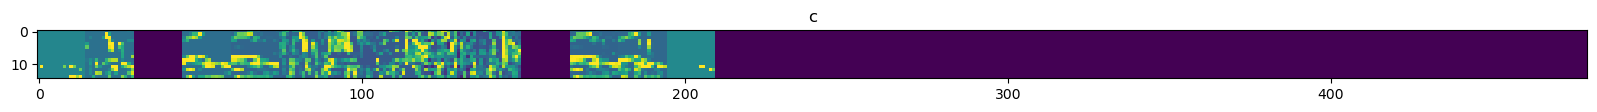

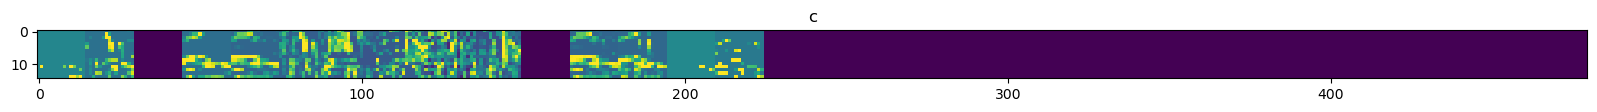

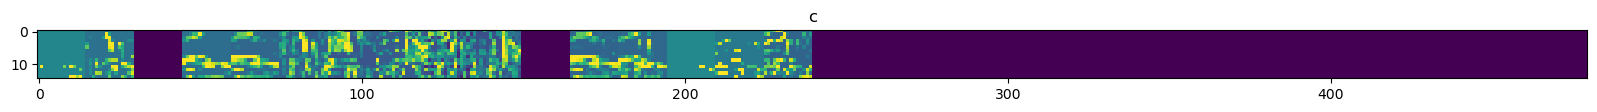

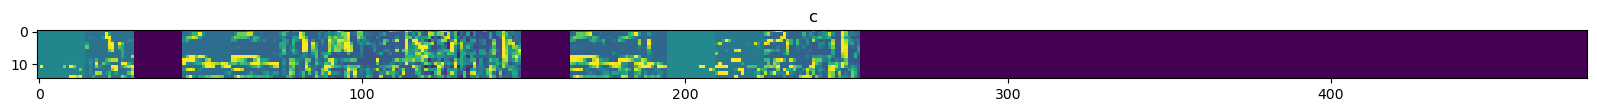

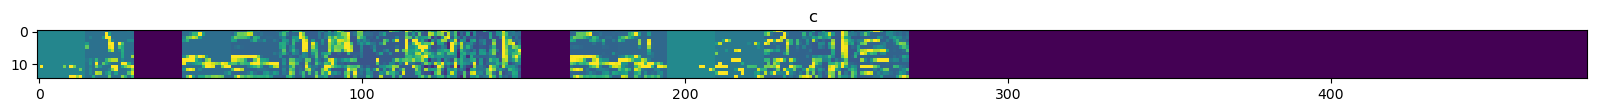

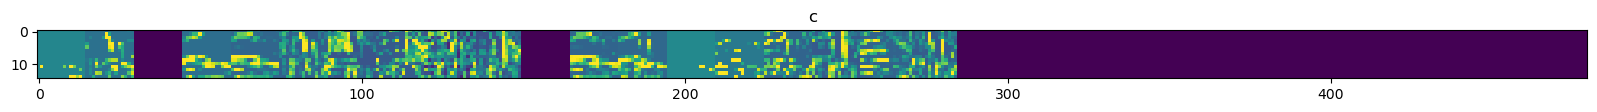

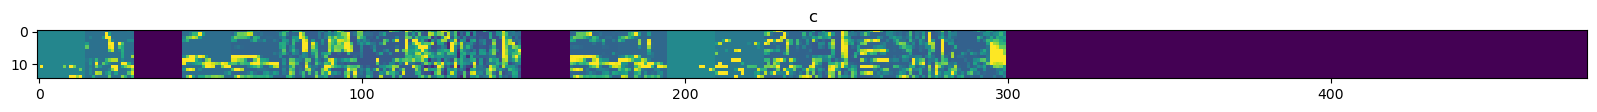

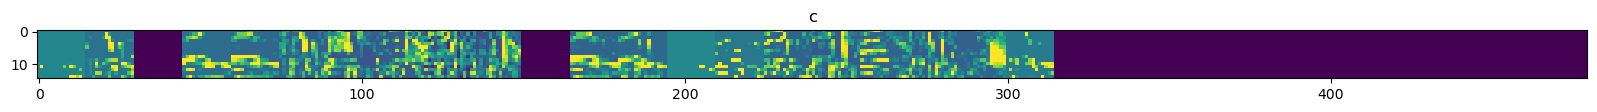

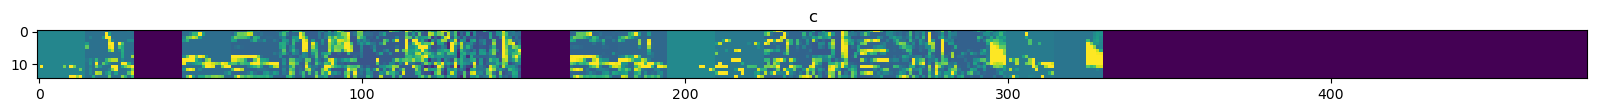

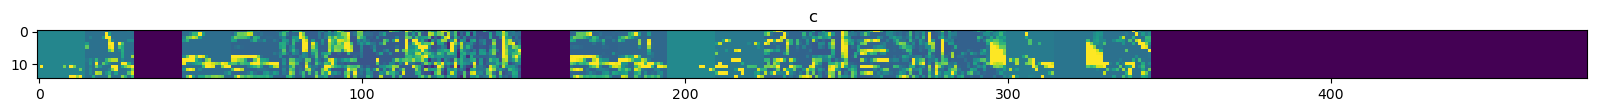

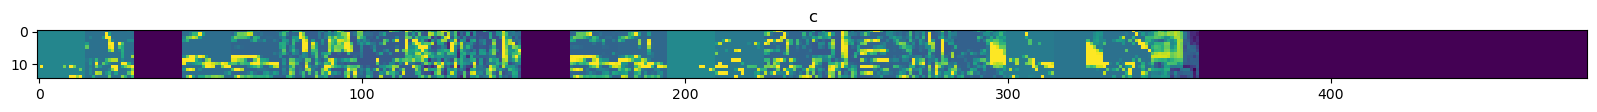

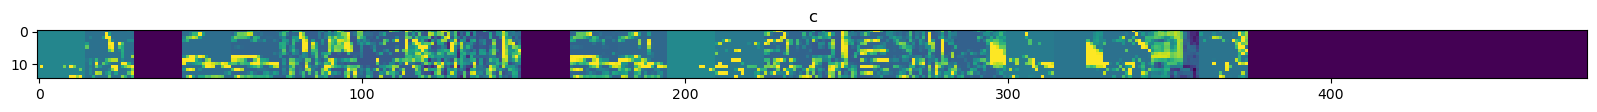

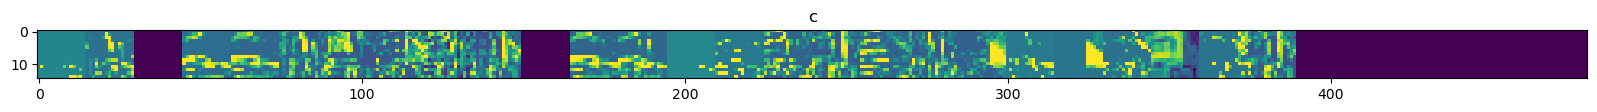

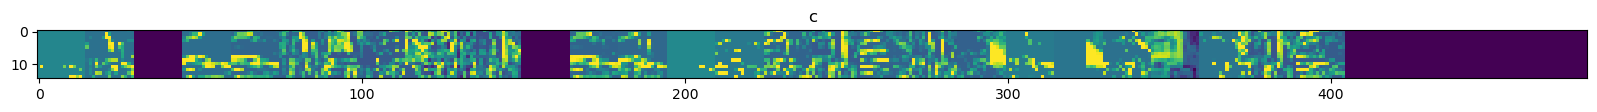

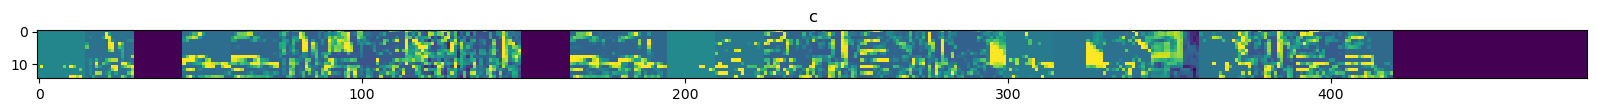

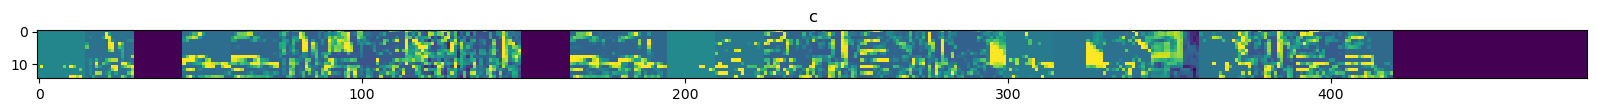

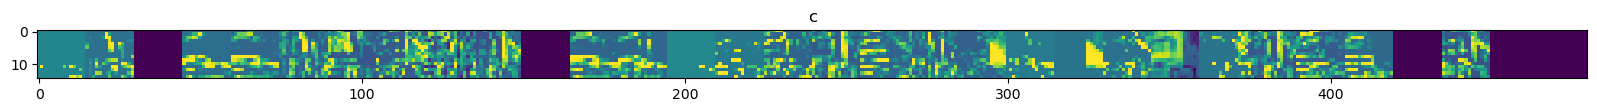

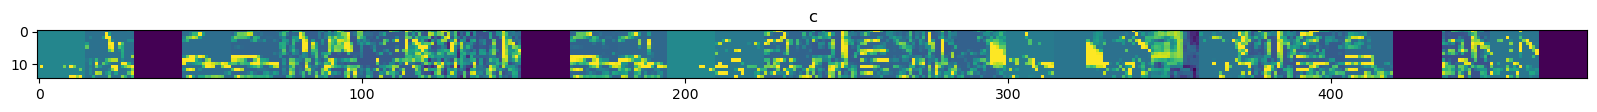

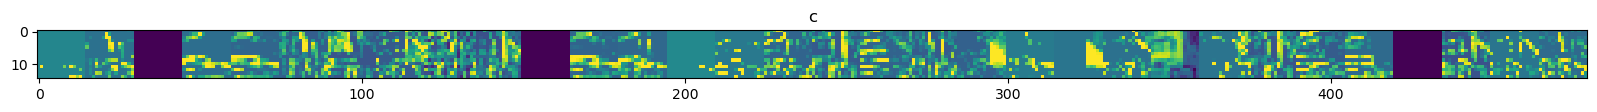

In [51]:
for layer_names, feature_maps in zip(layer_names, feature_maps):
    print(feature_maps.shape)
    if len(feature_maps.shape) == 4:
        channels = feature_maps.shape[-1]
        size = feature_maps.shape[1]
        display_grid = np.zeros((size,size*channels))
        for i in range(channels):
            x = feature_maps[0,:,:,i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x,0,255).astype('uint8')
            # tile each filter into a big horizontal grid
            display_grid[:,i*size:(i+1)*size] = x
            
            scale = 20./channels
            plt.figure(figsize=(scale*channels, scale))
            plt.title(layer_names)
            plt.grid(False)
            plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')